In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/pysr1/BurlingtonHousingArticle-/master/BurlingtonHousing.csv'
df = pd.read_csv(url, error_bad_lines=False)
import pandas as pd   # tabular data
import numpy as np   # linear algebra, matrix operations, vectorized statistical functions
import matplotlib.pyplot as plt   # scientific plotting
import seaborn as sns   # statistical plots
import warnings   # to turn off annoying warnings
import scipy.stats as stats   # for the spearman correlation function
warnings.simplefilter(action='ignore', category=FutureWarning)  



In [ ]:
# more info on ridge
# http://www.science.smith.edu/~jcrouser/SDS293/labs/lab10-py.html


# TODO: PIPE and STACK PREDICTORS

# https://scikit-learn.org/stable/auto_examples/ensemble/plot_stack_predictors.html#sphx-glr-auto-examples-ensemble-plot-stack-predictors-py
# https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html#the-machine-learning-pipeline
# https://www.kaggle.com/jmataya/regularization-with-lasso-and-ridge
# https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html#the-machine-learning-pipeline
# https://seaborn.pydata.org/tutorial/regression.html
# https://www.kaggle.com/pouryaayria/a-complete-ml-pipeline-tutorial-acu-86

In [ ]:
df.head()

,SalePrice,LandUse,CurrentAcres,TotalGrossArea,FinishedArea,CurrentValue,CurrentLandValue,CurrentYardItemsValue,CurrentBuildingValue,VermontHPI,USGDP,USHPI,Consumer Price Index,CPI House,YearBlt
0,158000,Single Family,0.05597,1760,840.00000,152500.0,121600,0,30900.0,444.32,15189.222,330.35,215.344000,216.663333,1912
1,231750,Single Family,0.08242,2676,1436.00000,241900.0,94400,700,146800.0,445.88,15302.705,369.98,201.266667,202.233333,1899
2,381500,Residential Condo,0.00000,2184,1572.80005,268000.0,0,0,268000.0,440.46,15356.058,327.89,217.030000,216.934333,1986
3,430000,Single Family,0.09832,3699,2087.00000,340800.0,130100,0,210700.0,438.54,16239.138,313.02,231.369333,224.403333,1910
4,263000,Residential Condo,0.00000,2893,1657.25000,248400.0,0,0,248400.0,456.46,15752.308,360.54,215.537667,215.909000,1989


In [ ]:
df.dtypes

SalePrice                  int64
LandUse                   object
CurrentAcres             float64
TotalGrossArea             int64
FinishedArea             float64
CurrentValue             float64
CurrentLandValue           int64
CurrentYardItemsValue      int64
CurrentBuildingValue     float64
VermontHPI               float64
USGDP                    float64
USHPI                    float64
Consumer Price Index     float64
CPI House                float64
YearBlt                    int64
dtype: object

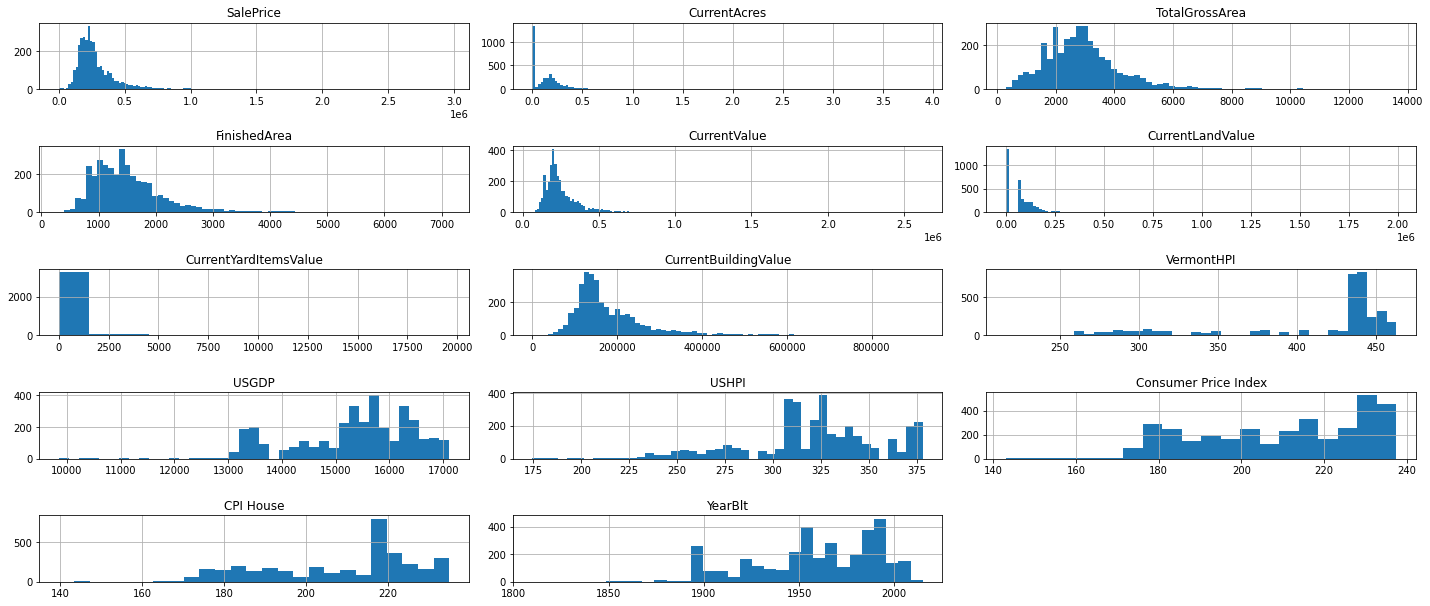

In [ ]:
df.hist(figsize=(20,10),
        layout=(6,3),
        bins='auto')


plt.tight_layout()
#plt.savefig('plots/first.png')
plt.show()
        
        
        
        

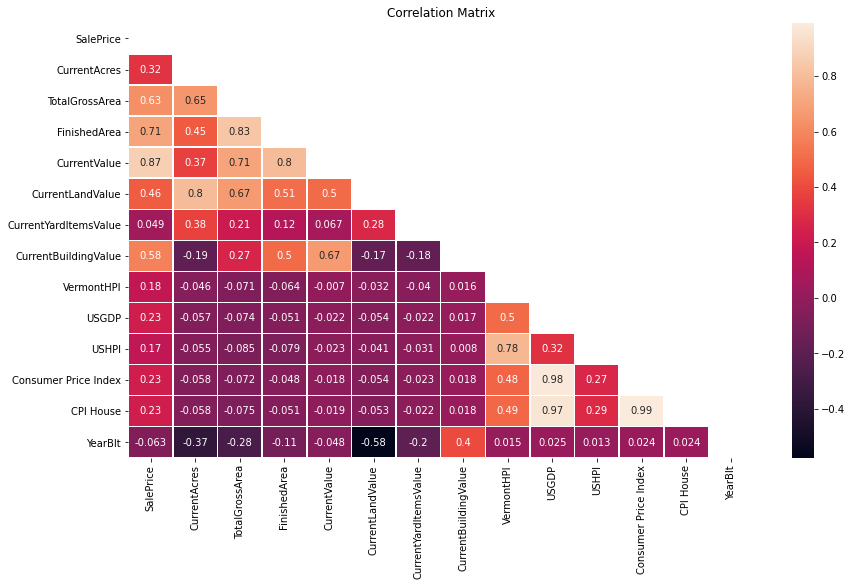

In [ ]:
#correlation


plt.figure(figsize=(14,8))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

sns.heatmap(round(df.corr(method='spearman'), 3), mask = mask,
                  annot=True, linewidth=0.5)
plt.title('Correlation Matrix')
#plt.tight_layout()
plt.show()

Text(27.125, 0.5, 'SalePrice')

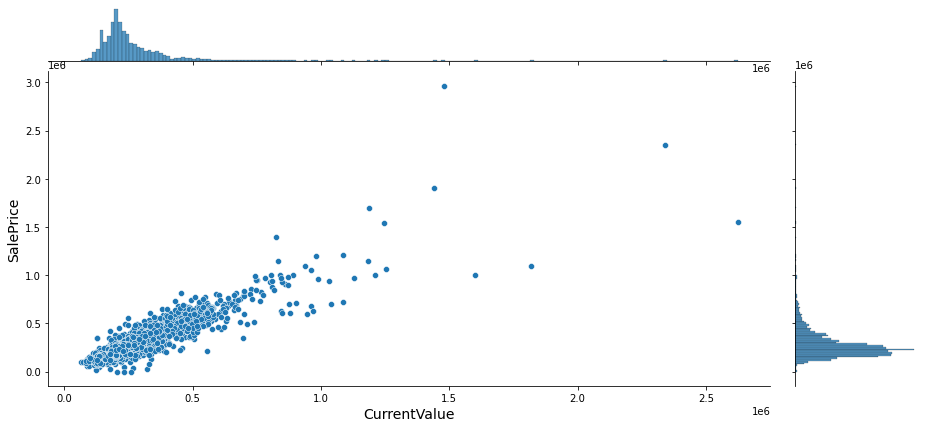

In [ ]:
joint = sns.jointplot('CurrentValue', 'SalePrice', data=df)
joint.fig.set_size_inches(14,6)
#joint.annotate(stats.spearmanr)
joint.ax_joint.set_xlabel('CurrentValue', size=14)
joint.ax_joint.set_ylabel('SalePrice', size=14)



In [ ]:
topcorr = df.corr(method= 'spearman')['SalePrice'].sort_values()[:-1].tail(6)
bottomcorr = df.corr(method= 'spearman')['SalePrice'].sort_values()[:-1].head(6)


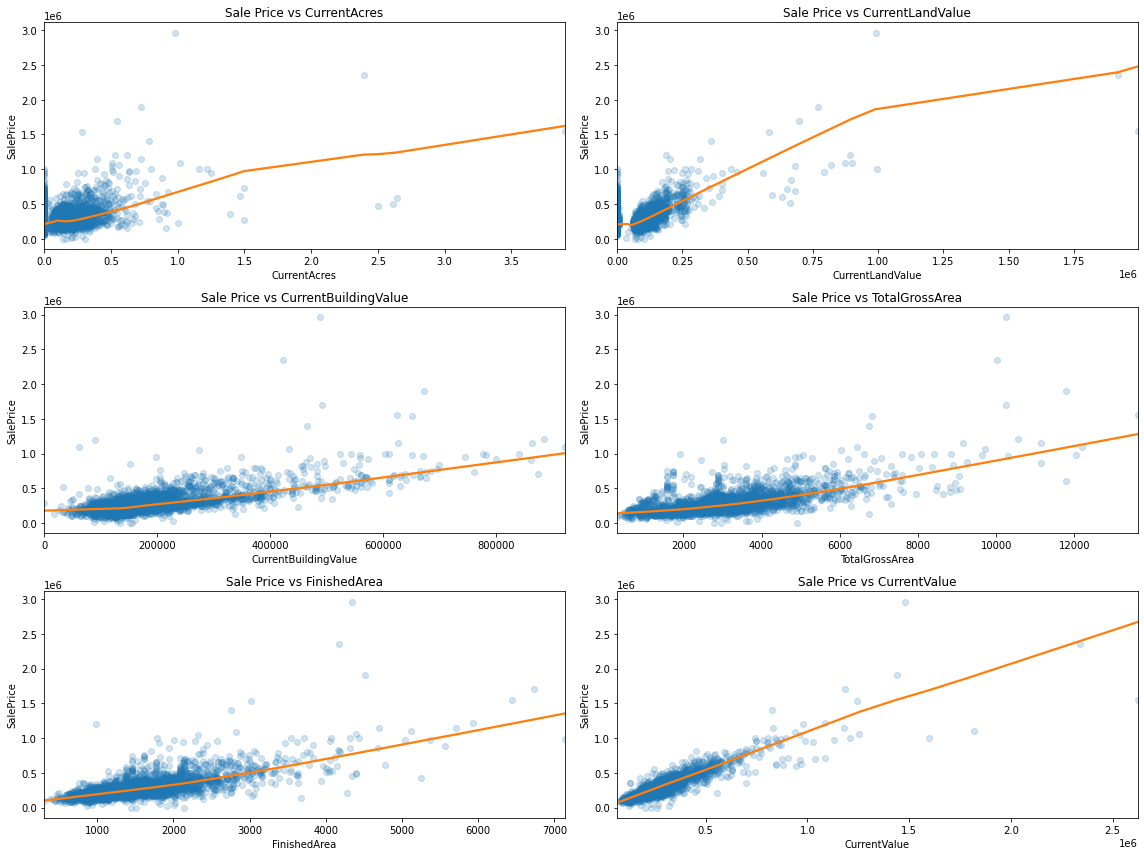

In [ ]:
fig, ax = plt.subplots(3,2, figsize=(16, 12))
ax = ax.ravel()
j = 0
for i in topcorr.index:
  sns.regplot(i, 'SalePrice', ax=ax[j], lowess=True, data=df, color='C0', line_kws={"color": "C1"}, scatter_kws={"alpha": 0.2})
  ax[j].set_title("Sale Price vs {}".format((i)))
  j += 1
plt.tight_layout()
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in true_divide
  res = _lowess(y, x, frac=frac, it=it, delta=delta)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


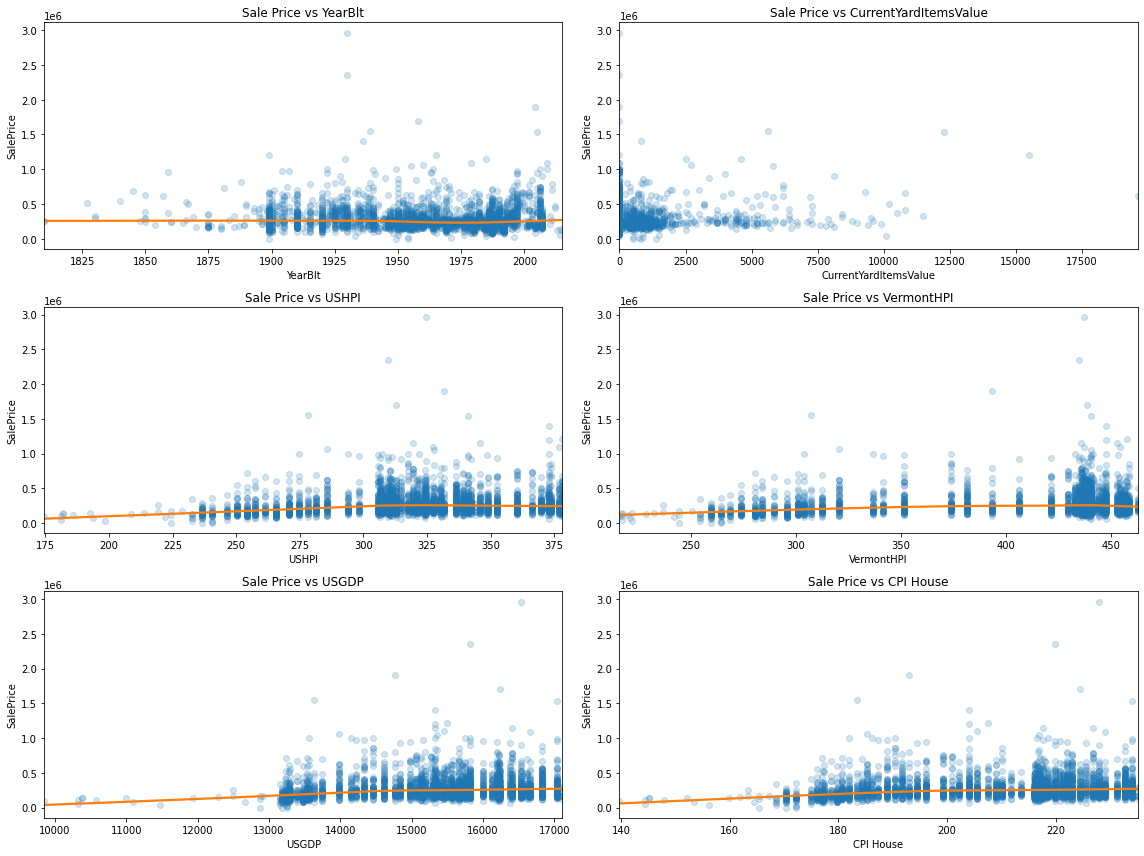

In [ ]:
fig, ax = plt.subplots(3,2, figsize=(16, 12))
ax = ax.ravel()
j = 0
for i in bottomcorr.index:
  sns.regplot(i, 'SalePrice', ax=ax[j], lowess=True, data=df, color='C0', line_kws={"color": "C1"}, scatter_kws={"alpha": 0.2})
  ax[j].set_title("Sale Price vs {}".format((i)))
  j += 1
plt.tight_layout()
plt.show()

In [ ]:
df[['LandUse']].head()

,LandUse
0,Single Family
1,Single Family
2,Residential Condo
3,Single Family
4,Residential Condo


In [ ]:
pd.get_dummies(df['LandUse'])

,Residential Condo,Single Family
0,0,1
1,0,1
2,1,0
3,0,1
4,1,0
...,...,...
3456,1,0
3457,0,1
3458,1,0
3459,0,1


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.exceptions import DataConversionWarning
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score, train_test_split
# to filter out some stupid warnings
warnings.filterwarnings(action='ignore', category=DataConversionWarning)


In [ ]:
df_dummies = pd.get_dummies(df)
init_frame = df_dummies.copy()
X = init_frame.drop('SalePrice', 1)
y = init_frame['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

In [ ]:
alphas, scores = [] , []


In [ ]:
for i in [0, 1e-6, 1e-4, 1e-2,.1, 1, 5, 10, 20, 30, 50, 100,200,300,400,500,750, 1000]:
  pipe = Pipeline([
                   ('scaler', StandardScaler()),
                   ('ridge', Ridge(alpha=i))])
  
  score = cross_val_score(pipe, X_train, y_train, cv = 10)
  for x in score:
    scores.append(x)
    alphas.append(i)

ridge_frame = pd.DataFrame({'alpha': alphas, 'score': scores})
top_alpha = ((ridge_frame.groupby('alpha', as_index=False).mean().sort_values('score')))
top_alpha = top_alpha.iloc[-1:, 0].values


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.71293e-17): result may not be accurate.
  overwrite_a=True).T


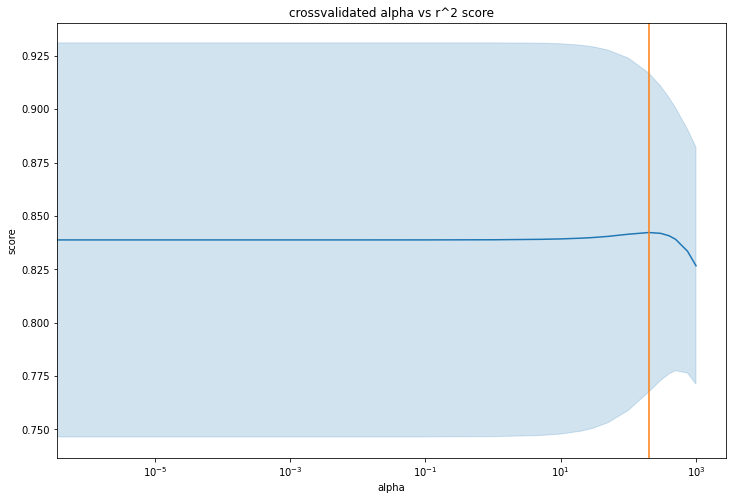

In [ ]:
plt.figure(figsize=(12,8))
sns.lineplot('alpha', 'score', data=ridge_frame, ci='sd')
plt.title('crossvalidated alpha vs r^2 score')
plt.axvline(top_alpha, color='C1')
plt.xscale('log')

In [ ]:
pipe = Pipeline([
                 ('scaler', StandardScaler()),
                 ('ridge', Ridge(alpha=top_alpha))
                 ])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)


0.8834401477631565

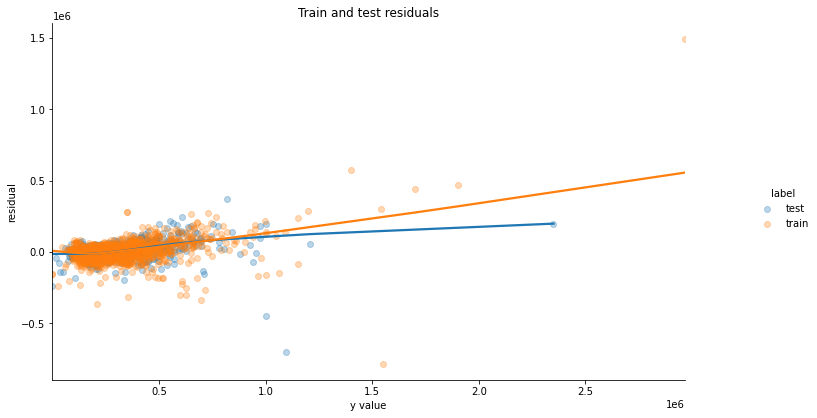

In [ ]:
residuals_test = pd.DataFrame({'y value' : y_test,
                               'residual': y_test - pipe.predict(X_test), 
                               'label' : "test" })

residuals_train = pd.DataFrame({'y value' : y_train,
                                'residual' : y_train - pipe.predict(X_train),
                                'label' : 'train'})

residuals =  pd.concat([residuals_test, residuals_train])
# https://seaborn.pydata.org/tutorial/regression.html

lm = sns.lmplot(
    x = 'y value',
    y = 'residual',
    hue = 'label',
    data = residuals,
    lowess = True,
    scatter_kws = {"alpha": 0.3}
)

plt.title('Train and test residuals')
lm.fig.set_size_inches(12,6)


In [ ]:
def coef_plot(model, X, abs_ = False):
  if abs_ == False:
    coefs = pd.DataFrame({'name': X.columns,
                           'coef': model.coef_}).sort_values('coef')
  else:
    coefs = pd.DataFrame({'name' : X.columns,
                          'coef' : np.abs(model.coef_)}).sort_values('coef')
  plt.figure(figsize= (16,10))
  sns.pointplot(y='name',
                x='coef', data=coefs, ci=None, color='C0', alpha=0.2)
  plt.title('Coef plot')
  plt.tight_layout()

coef_plot(rcv, X, abs_ = False)



NameError: ignored